In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import seaborn as sns

In [2]:
#display versions
print( 'Jupyter Notebook Version:{}' .format(sys.version))
print('Numpy Version:{}:'.format(np.__version__))
print('Pandas Version:{}'.format(  pd.__version__))
print('Matplotlib Version: {}'.format(matplotlib.__version__))
print('Seaborn Version: {}'.format(sns.__version__))

Jupyter Notebook Version:3.5.2 |Enthought, Inc. (x86_64)| (default, Mar  2 2017, 16:37:47) [MSC v.1900 64 bit (AMD64)]
Numpy Version:1.13.3:
Pandas Version:0.20.3
Matplotlib Version: 2.0.0
Seaborn Version: 0.8.1


In [3]:
#load dataset as a pandas dataframe
#obtained from https://archive.ics.uci.edu/ml/datasets/Automobile
dset = pd.read_csv("automobiles.csv")

In [4]:
#df for encoded data , df_pure for non encoded
df = pd.DataFrame(dset)
#df_pure = pd.DataFrame(dset)

In [5]:
df.shape

(205, 26)

In [6]:
df = df[df.price!= '?']

In [7]:
df.shape

(201, 26)

In [8]:
#getting types of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nul

In [9]:
df = df.drop('normalized-losses',axis=1)

In [10]:
df.head()

symboling         make fuel-type aspiration num-of-doors   body-style  \
0          3  alfa-romero       gas        std          two  convertible   
1          3  alfa-romero       gas        std          two  convertible   
2          1  alfa-romero       gas        std          two    hatchback   
3          2         audi       gas        std         four        sedan   
4          2         audi       gas        std         four        sedan   

  drive-wheels engine-location  wheel-base  length  ...    engine-size  \
0          rwd           front        88.6   168.8  ...            130   
1          rwd           front        88.6   168.8  ...            130   
2          rwd           front        94.5   171.2  ...            152   
3          fwd           front        99.8   176.6  ...            109   
4          4wd           front        99.4   176.6  ...            136   

   fuel-system  bore stroke compression-ratio  horsepower peak-rpm city-mpg  \
0         mpfi  3.47   2.68               9.0         111     5000       21   
1         mpfi  3.47   2.68               9.0         111     5000       21   
2         mpfi  2.68   3.47               9.0         154     5000       19   
3         mpfi  3.19    3.4              10.0         102     5500       24   
4         mpfi  3.19    3.4               8.0         115     5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 25 columns]

In [11]:
df['symboling'].astype('category').value_counts()

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [12]:
df['aspiration'].astype('category').value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [13]:
df['drive-wheels'].astype('category').value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [14]:
#convert type of price from object to float
df.price = df.price.astype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
symboling            201 non-null int64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-null object
peak-rpm             201 non-nul

In [16]:
#obtaining numerical attributes for correlation
df_numeric=df.select_dtypes(include=['float64', 'int64'])

df_numeric.head()

symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0          3        88.6   168.8   64.1    48.8         2548          130   
1          3        88.6   168.8   64.1    48.8         2548          130   
2          1        94.5   171.2   65.5    52.4         2823          152   
3          2        99.8   176.6   66.2    54.3         2337          109   
4          2        99.4   176.6   66.4    54.3         2824          136   

   compression-ratio  city-mpg  highway-mpg    price  
0                9.0        21           27  13495.0  
1                9.0        21           27  16500.0  
2                9.0        19           26  16500.0  
3               10.0        24           30  13950.0  
4                8.0        18           22  17450.0

In [17]:
#obtain correlation matrix of the numeric dataset
cor = df_numeric.corr()

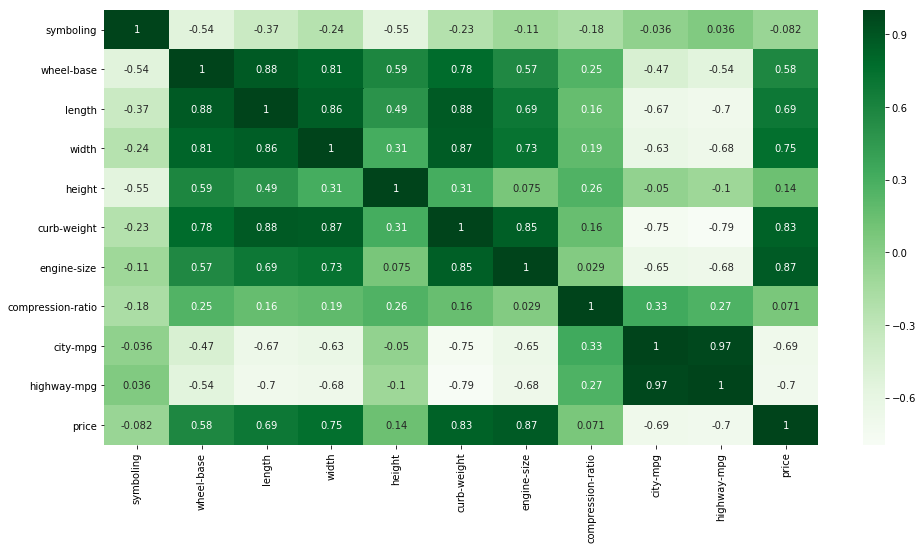

In [18]:
# figure size
plt.figure(figsize=(16,8))

# heatmap to check the relationship between different numerical attributes
sns.heatmap(cor, cmap="Greens", annot=True)
plt.show()

In [19]:
#df = df.drop('symboling',axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
symboling            201 non-null int64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-null object
peak-rpm             201 non-nul

In [21]:
# Extracting carname

# Method 1: str.split() by space
carnames = df['make'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
30          honda
Name: make, dtype: object

In [22]:
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = df['make'].apply(lambda x: re.findall(p, x)[0])

In [23]:
carnames = df['make'].apply(lambda x: x.split(" ")[0])
df['car_company'] = df['make'].apply(lambda x: re.findall(p, x)[0])
df['car_company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: car_company, dtype: object

In [24]:
# replacing misspelled car_company names

# volkswagen
df.loc[(df['car_company'] == "vw") | 
         (df['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
df.loc[df['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
df.loc[df['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
df.loc[df['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
df.loc[df['car_company'] == "maxda", 'car_company'] = 'mazda'

In [25]:
df['car_company'].astype('category').value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: car_company, dtype: int64

In [26]:
df = df.drop('make', axis=1)
df.head()

symboling fuel-type aspiration num-of-doors   body-style drive-wheels  \
0          3       gas        std          two  convertible          rwd   
1          3       gas        std          two  convertible          rwd   
2          1       gas        std          two    hatchback          rwd   
3          2       gas        std         four        sedan          fwd   
4          2       gas        std         four        sedan          4wd   

  engine-location  wheel-base  length  width     ...       fuel-system  bore  \
0           front        88.6   168.8   64.1     ...              mpfi  3.47   
1           front        88.6   168.8   64.1     ...              mpfi  3.47   
2           front        94.5   171.2   65.5     ...              mpfi  2.68   
3           front        99.8   176.6   66.2     ...              mpfi  3.19   
4           front        99.4   176.6   66.4     ...              mpfi  3.19   

  stroke compression-ratio  horsepower peak-rpm city-mpg highway-mpg    price  \
0   2.68               9.0         111     5000       21          27  13495.0   
1   2.68               9.0         111     5000       21          27  16500.0   
2   3.47               9.0         154     5000       19          26  16500.0   
3    3.4              10.0         102     5500       24          30  13950.0   
4    3.4               8.0         115     5500       18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 25 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
symboling            201 non-null int64
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-null object
peak-rpm             201 non-null object
city-mpg             201 non-nul

In [28]:
# creating dummy variables for categorical variables

# subset all categorical variables
# cars_categorical = df.select_dtypes(include=['object'])
# cars_categorical.head()

In [29]:
# cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
# cars_dummies.head()

In [30]:
# drop categorical variables 
# df = df.drop(list(cars_categorical.columns), axis=1)

In [31]:
# concat dummy variables with X
# df = pd.concat([df, cars_dummies], axis=1)

In [32]:
#Encoding the dataset
from sklearn.preprocessing import LabelEncoder   

In [33]:
le=LabelEncoder()

In [34]:
for col in df.columns.values:
    if df[col].dtypes=='object':
        data = df[col]
        le.fit(data.values)
        df[col]=le.transform(df[col])

In [35]:
df.shape

(201, 25)

In [36]:
df.head()

symboling  fuel-type  aspiration  num-of-doors  body-style  drive-wheels  \
0          3          1           0             2           0             2   
1          3          1           0             2           0             2   
2          1          1           0             2           2             2   
3          2          1           0             1           3             1   
4          2          1           0             1           3             0   

   engine-location  wheel-base  length  width     ...       fuel-system  bore  \
0                0        88.6   168.8   64.1     ...                 5    23   
1                0        88.6   168.8   64.1     ...                 5    23   
2                0        94.5   171.2   65.5     ...                 5     1   
3                0        99.8   176.6   66.2     ...                 5    13   
4                0        99.4   176.6   66.4     ...                 5    13   

   stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0       4                9.0           5        10        21           27   
1       4                9.0           5        10        21           27   
2      27                9.0          20        10        19           26   
3      24               10.0           2        16        24           30   
4      24                8.0           8        16        18           22   

     price  car_company  
0  13495.0            0  
1  16500.0            0  
2  16500.0            0  
3  13950.0            1  
4  17450.0            1  

[5 rows x 25 columns]

In [37]:
df.columns

Index(['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'car_company'],
      dtype='object')

In [38]:
#import for dividing dataset into train and test samples
from sklearn.model_selection import train_test_split

In [39]:
#perform train test split
x = df.drop('price',axis=1)
y = df.price

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [40]:
# #scaling the features
# from sklearn.preprocessing import scale

# # storing column names in cols, since column names are (annoyingly) lost after 
# # scaling (the df is converted to a numpy array)
# cols = x_train.columns
# x_train = pd.DataFrame(scale(x_train))
# x_train.columns = cols
# x_train.columns

In [41]:
# #scaling the features
# from sklearn.preprocessing import scale

# # storing column names in cols, since column names are (annoyingly) lost after 
# # scaling (the df is converted to a numpy array)
# cols = x_test.columns
# x_test = pd.DataFrame(scale(x_test))
# x_test.columns = cols
# x_test.columns

In [42]:
x_train.head()

symboling  fuel-type  aspiration  num-of-doors  body-style  drive-wheels  \
69           0          0           1             2           1             2   
27           1          1           1             0           3             1   
116          0          0           1             1           3             2   
172          2          1           0             2           0             2   
66           0          0           0             1           3             2   

     engine-location  wheel-base  length  width     ...       engine-size  \
69                 0       106.7   187.5   70.3     ...               183   
27                 0        93.7   157.3   63.8     ...                98   
116                0       107.9   186.7   68.4     ...               152   
172                0        98.4   176.2   65.6     ...               146   
66                 0       104.9   175.0   66.1     ...               134   

     fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
69             3    26      32               21.5          12         3   
27             5     7      23                7.6           2        16   
116            3    32      29               21.0          56         0   
172            5    30      28                9.3           9         8   
66             3    21      32               22.0          44         1   

     city-mpg  highway-mpg  car_company  
69         22           25            9  
27         24           30            4  
116        28           33           13  
172        24           30           19  
66         31           39            8  

[5 rows x 24 columns]

In [43]:
y_train.head()

price
69   28176.0
27    8558.0
116  17950.0
172  17669.0
66   18344.0

In [44]:
x_test.shape

(41, 24)

In [45]:
y_test.shape

(41, 1)

In [46]:
# #plot the graphs of the variation in data
# x_train[x_train.dtypes[(x_train.dtypes=="float64")|(x_train.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11]);

In [47]:
#performing linear regression
from sklearn.linear_model import LinearRegression

In [48]:
linearRegressor = LinearRegression()

In [49]:
linearRegressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
#performing prediction
y_predict = linearRegressor.predict(x_test)

In [51]:
# #displaying output side by side
# from IPython.display import display, HTML

# CSS = """
# .output {
#     flex-direction: row;
# }
# """

# HTML('<style>{}</style>'.format(CSS))

In [52]:
display(pd.DataFrame(y_test))
display(pd.DataFrame(y_predict))

NameError: name 'display' is not defined

In [ ]:
#import library for accuracy calculation
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_predict)

In [ ]:
#0.8682... without dropping symboling
#mean difference = 54.358

In [ ]:
#calculate the mean difference
np.mean(y_test-y_predict)

In [ ]:
#making a plot of the price distribution so as to show the mean difference is not much
sns.distplot(df['price'],bins=50)
plt.show()